In [1]:
%matplotlib inline
# import functions from python directory
import sys
sys.path.append("../python")
import os
import seaborn
import cmocean
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from LESnc import load_stats, load_full, MidPointNormalize

In [2]:
# plotting setup
rc('font',weight='normal',size=20,family='serif',serif='Times New Roman')
rc('text',usetex='True')

# Load Data

In [3]:
# directories
# figure save
figdir = "/home/bgreene/SBL_LES/figures/spectrogram/"
# list of simulations to loop over
sims = ["cr0.10_u08", "cr0.25_u08", "cr0.33_u08", "cr0.50_u08",
        "cr1.00_u08", "cr1.50_u08", "cr2.00_u08", "cr2.50_u08"]
# empty list to construct paths and store
dnc_all = []
sall = []
Eall = []
Gall = []
# loop over sims and load stats, spectrogram data
for sim in sims:
    dnc = f"/home/bgreene/simulations/{sim}_192/output/netcdf/"
    dnc_all.append(dnc)
    # load stats file
    s = load_stats(dnc+"average_statistics.nc")
    sall.append(s)
    # load spectrogram file
    E = xr.load_dataset(dnc+"spectrogram.nc")
    Eall.append(E)
    # load LCS file
    g = xr.load_dataset(dnc+"G2.nc")
    Gall.append(g)

Reading file: /home/bgreene/simulations/cr0.10_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.25_u08_192/output/netcdf/average_statistics.nc


/home/bgreene/anaconda3/lib/python3.7/site-packages/xarray/core/computation.py:742: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


Reading file: /home/bgreene/simulations/cr0.33_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.50_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr1.00_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr1.50_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.00_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.50_u08_192/output/netcdf/average_statistics.nc


In [4]:
# define colormap based on number of simulations
nsim = len(sims)
cmap1 = seaborn.color_palette("cubehelix_r", nsim)
cmap2 = seaborn.color_palette("cubehelix_r", as_cmap=True)
cmap2_r = seaborn.color_palette("cubehelix", as_cmap=True)
cmap3 = cmocean.cm.balance

# Plot Spectrograms

## $\phi_{uu}$, $\phi_{ww}$, $\phi_{\theta \theta}$

[Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$')]

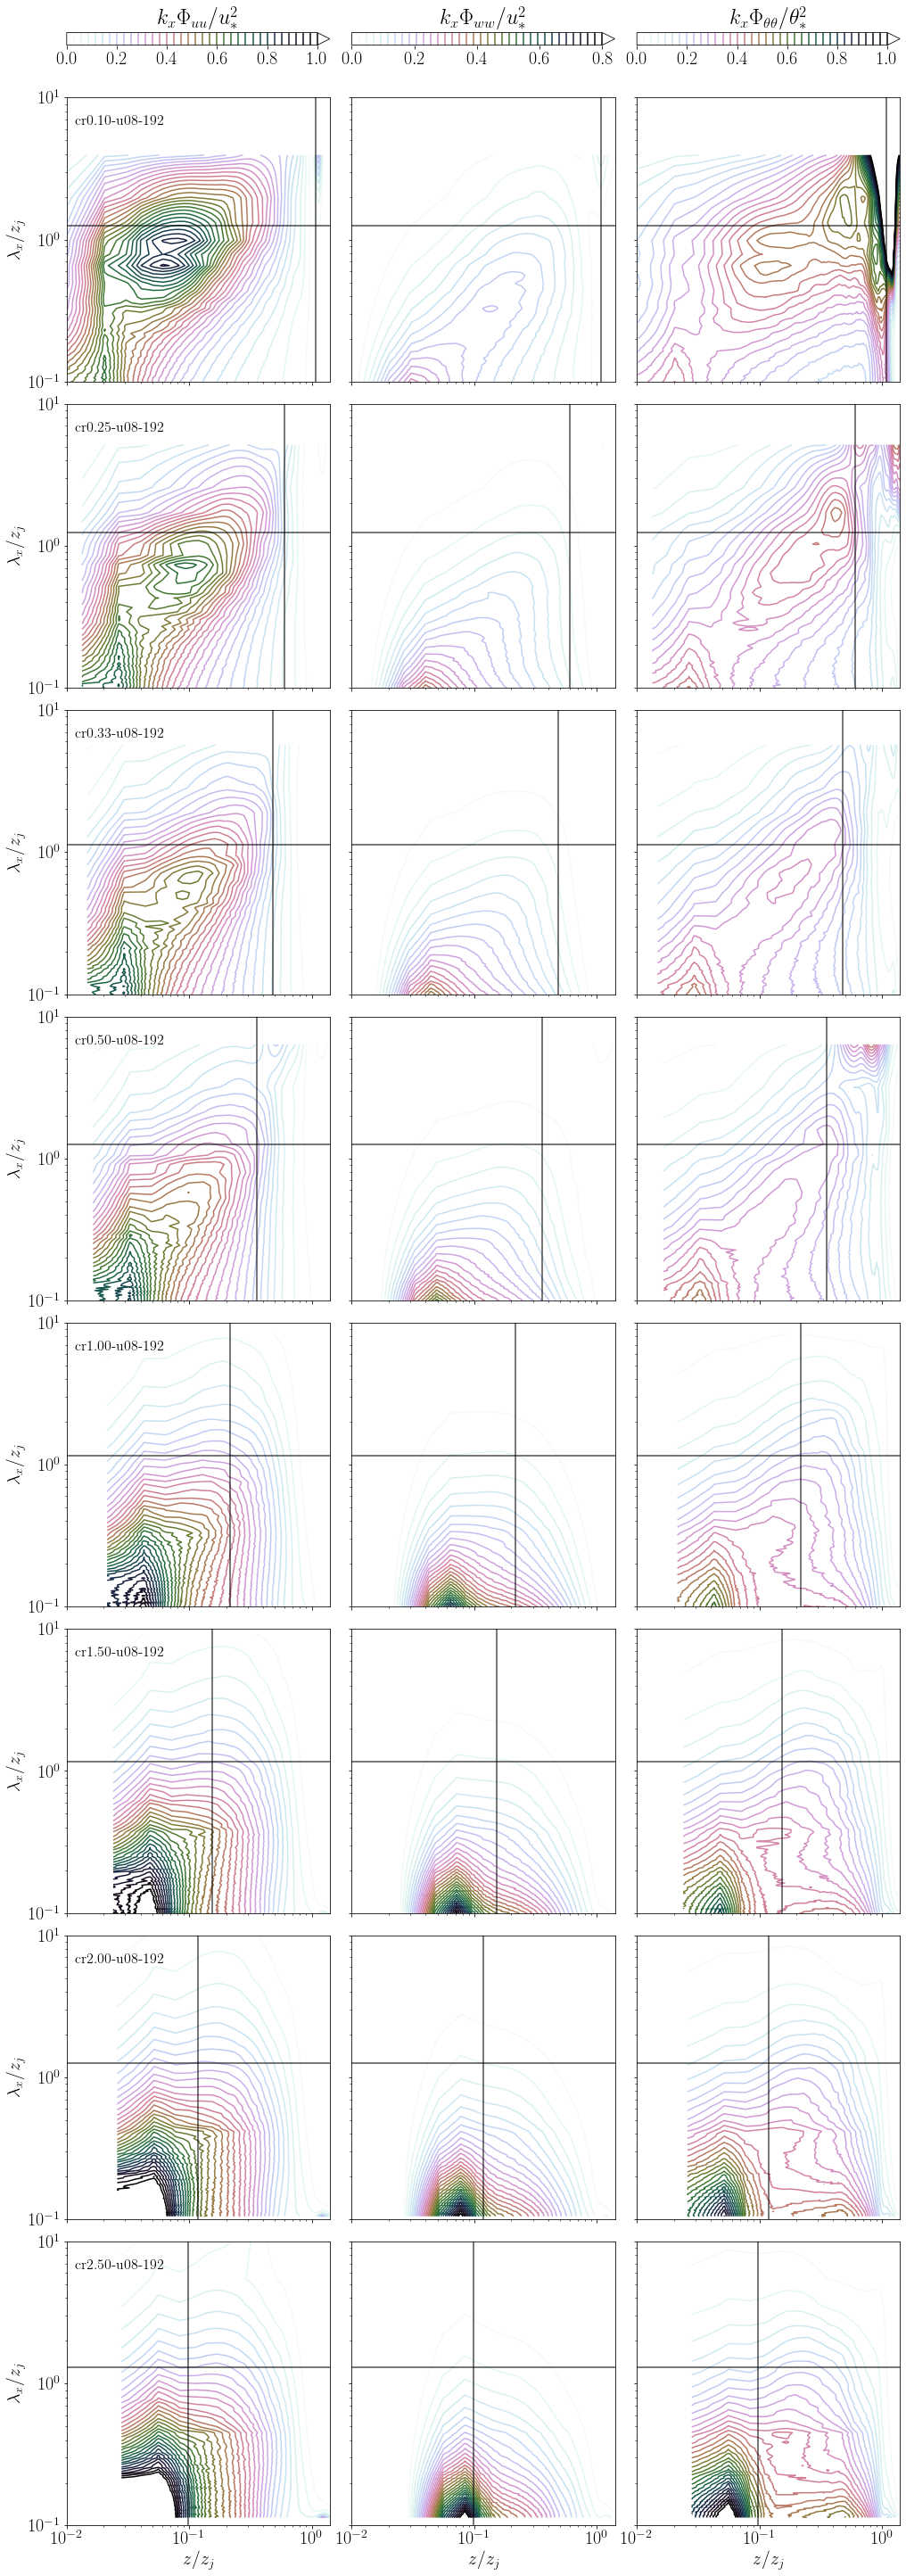

In [5]:
# plot all sims, 1 per row
fig1, ax1 = plt.subplots(nrows=nsim, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(14, 5*nsim))
# plotting parameters
nlevel = 36
# loop over sims
for ii, (s, E) in enumerate(zip(sall, Eall)):
    cax1u = ax1[ii,0].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                              E.freq_x*E.uu/s.ustar0/s.ustar0,
                              levels=np.linspace(0.0, 1.0, nlevel), extend="max",
                              cmap=cmap2)
    cax1w = ax1[ii,1].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                              E.freq_x*E.ww/s.ustar0/s.ustar0,
                              levels=np.linspace(0.0, 0.8, nlevel), extend="max",
                              cmap=cmap2)
    cax1t = ax1[ii,2].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                              E.freq_x*E.tt/s.tstar0/s.tstar0,
                              levels=np.linspace(0.0, 1.0, nlevel), extend="max",
                              cmap=cmap2)
    # dashed line for h/zj
    [iax.axhline(s.he/s.zj, color="k", alpha=0.7) for iax in ax1[ii,:]]
    # line for L/zj
    [iax.axvline(s.L/s.zj, color="k", alpha=0.7) for iax in ax1[ii,:]]
    # text in upper left corner with stability
    ax1[ii,0].text(0.03, 0.90, "-".join(s.stability.split("_")), 
                   fontsize=16, transform=ax1[ii,0].transAxes)
# colorbars
cb1u = fig1.colorbar(cax1u, ax=ax1[:,0], location="top", 
                     ticks=MultipleLocator(0.2), pad=0.01)
cb1w = fig1.colorbar(cax1w, ax=ax1[:,1], location="top", 
                     ticks=MultipleLocator(0.2), pad=0.01)
cb1t = fig1.colorbar(cax1t, ax=ax1[:,2], location="top", 
                     ticks=MultipleLocator(0.2), pad=0.01)
# cb ticks
cb1u.ax.xaxis.set_ticks_position("bottom")
cb1w.ax.xaxis.set_ticks_position("bottom")
cb1t.ax.xaxis.set_ticks_position("bottom")
# cb labels
cb1u.ax.set_xlabel("$k_x \\Phi_{uu} / u_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1w.ax.set_xlabel("$k_x \\Phi_{ww} / u_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1t.ax.set_xlabel("$k_x \\Phi_{\\theta\\theta} / \\theta_*^2$", fontsize=24, labelpad=10, fontweight="bold")

# clean up
# log axes
ax1[0,0].set_xscale("log")
ax1[0,0].set_yscale("log")
ax1[0,0].set_ylim([1e-1, 1e1])
ax1[0,0].set_xlim([1e-2, 1.4e0])
[iax.set_xlabel("$z/z_j$") for iax in ax1[-1,:]]
[iax.set_ylabel("$\\lambda_x / z_j$") for iax in ax1[:,0]]

## $\phi_{uw}$, $\phi_{\theta w}$, $\phi_{\theta u}$

[Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$'),
 Text(0, 0.5, '$\\lambda_x / z_j$')]

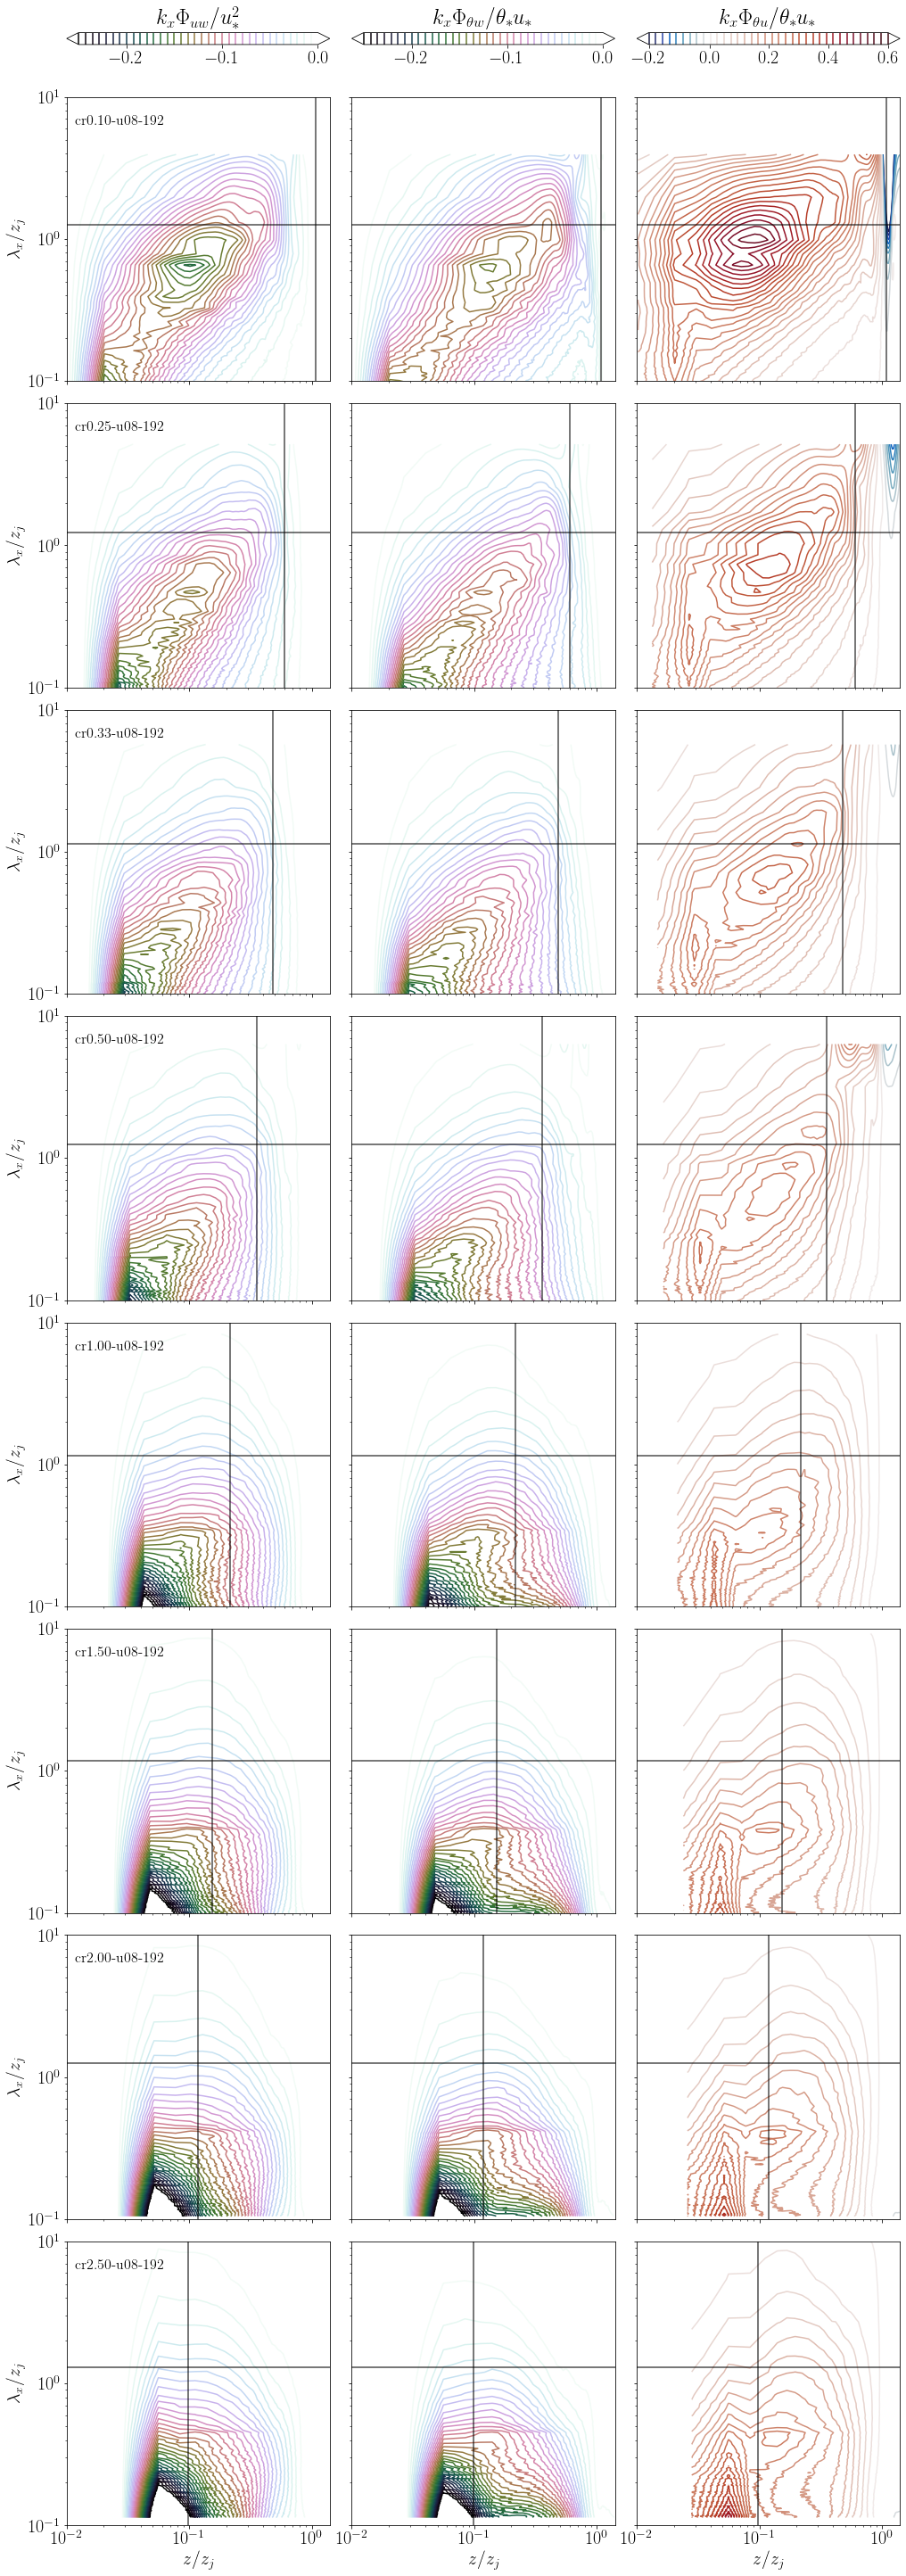

In [6]:
# plot all sims, 1 per row
fig2, ax2 = plt.subplots(nrows=nsim, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(14, 5*nsim))
# plotting parameters
nlevel = 36
norm=MidPointNormalize(midpoint=0.0)
# loop over sims
for ii, (s, E) in enumerate(zip(sall, Eall)):
    cax2uw = ax2[ii,0].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                               E.freq_x*E.uw/s.ustar0/s.ustar0,
                               levels=np.linspace(-0.25, 0.0, nlevel), extend="both",
                               cmap=cmap2_r)
    cax2tw = ax2[ii,1].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                               E.freq_x*E.tw/s.tstar0/s.ustar0,
                               levels=np.linspace(-0.25, 0.0, nlevel), extend="both",
                               cmap=cmap2_r)
    cax2tu = ax2[ii,2].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                               E.freq_x*E.tu/s.tstar0/s.ustar0,
                               levels=np.linspace(-0.2, 0.6, nlevel), extend="both",
                               cmap=cmap3, norm=norm)
    # dashed line for h/zj
    [iax.axhline(s.he/s.zj, color="k", alpha=0.7) for iax in ax2[ii,:]]
    # line for L/zj
    [iax.axvline(s.L/s.zj, color="k", alpha=0.7) for iax in ax2[ii,:]]
    # text in upper left corner with stability
    ax2[ii,0].text(0.03, 0.90, "-".join(s.stability.split("_")), 
                   fontsize=16, transform=ax2[ii,0].transAxes)
# colorbars
cb2uw = fig1.colorbar(cax2uw, ax=ax2[:,0], location="top", 
                      ticks=MultipleLocator(0.1), pad=0.01)
cb2tw = fig1.colorbar(cax2tw, ax=ax2[:,1], location="top", 
                      ticks=MultipleLocator(0.1), pad=0.01)
cb2tu = fig1.colorbar(cax2tu, ax=ax2[:,2], location="top", 
                      ticks=MultipleLocator(0.2), pad=0.01)
# cb ticks
cb2uw.ax.xaxis.set_ticks_position("bottom")
cb2tw.ax.xaxis.set_ticks_position("bottom")
cb2tu.ax.xaxis.set_ticks_position("bottom")
# cb labels
cb2uw.ax.set_xlabel("$k_x \\Phi_{uw} / u_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb2tw.ax.set_xlabel("$k_x \\Phi_{\\theta w} / \\theta_* u_*$", fontsize=24, labelpad=10, fontweight="bold")
cb2tu.ax.set_xlabel("$k_x \\Phi_{\\theta u} / \\theta_* u_*$", fontsize=24, labelpad=10, fontweight="bold")

# clean up
# log axes
ax2[0,0].set_xscale("log")
ax2[0,0].set_yscale("log")
ax2[0,0].set_ylim([1e-1, 1e1])
ax2[0,0].set_xlim([1e-2, 1.4e0])
[iax.set_xlabel("$z/z_j$") for iax in ax2[-1,:]]
[iax.set_ylabel("$\\lambda_x / z_j$") for iax in ax2[:,0]]

# Plot Linear Coherence Spectra

Text(0.5, 1.0, '$\\theta$')

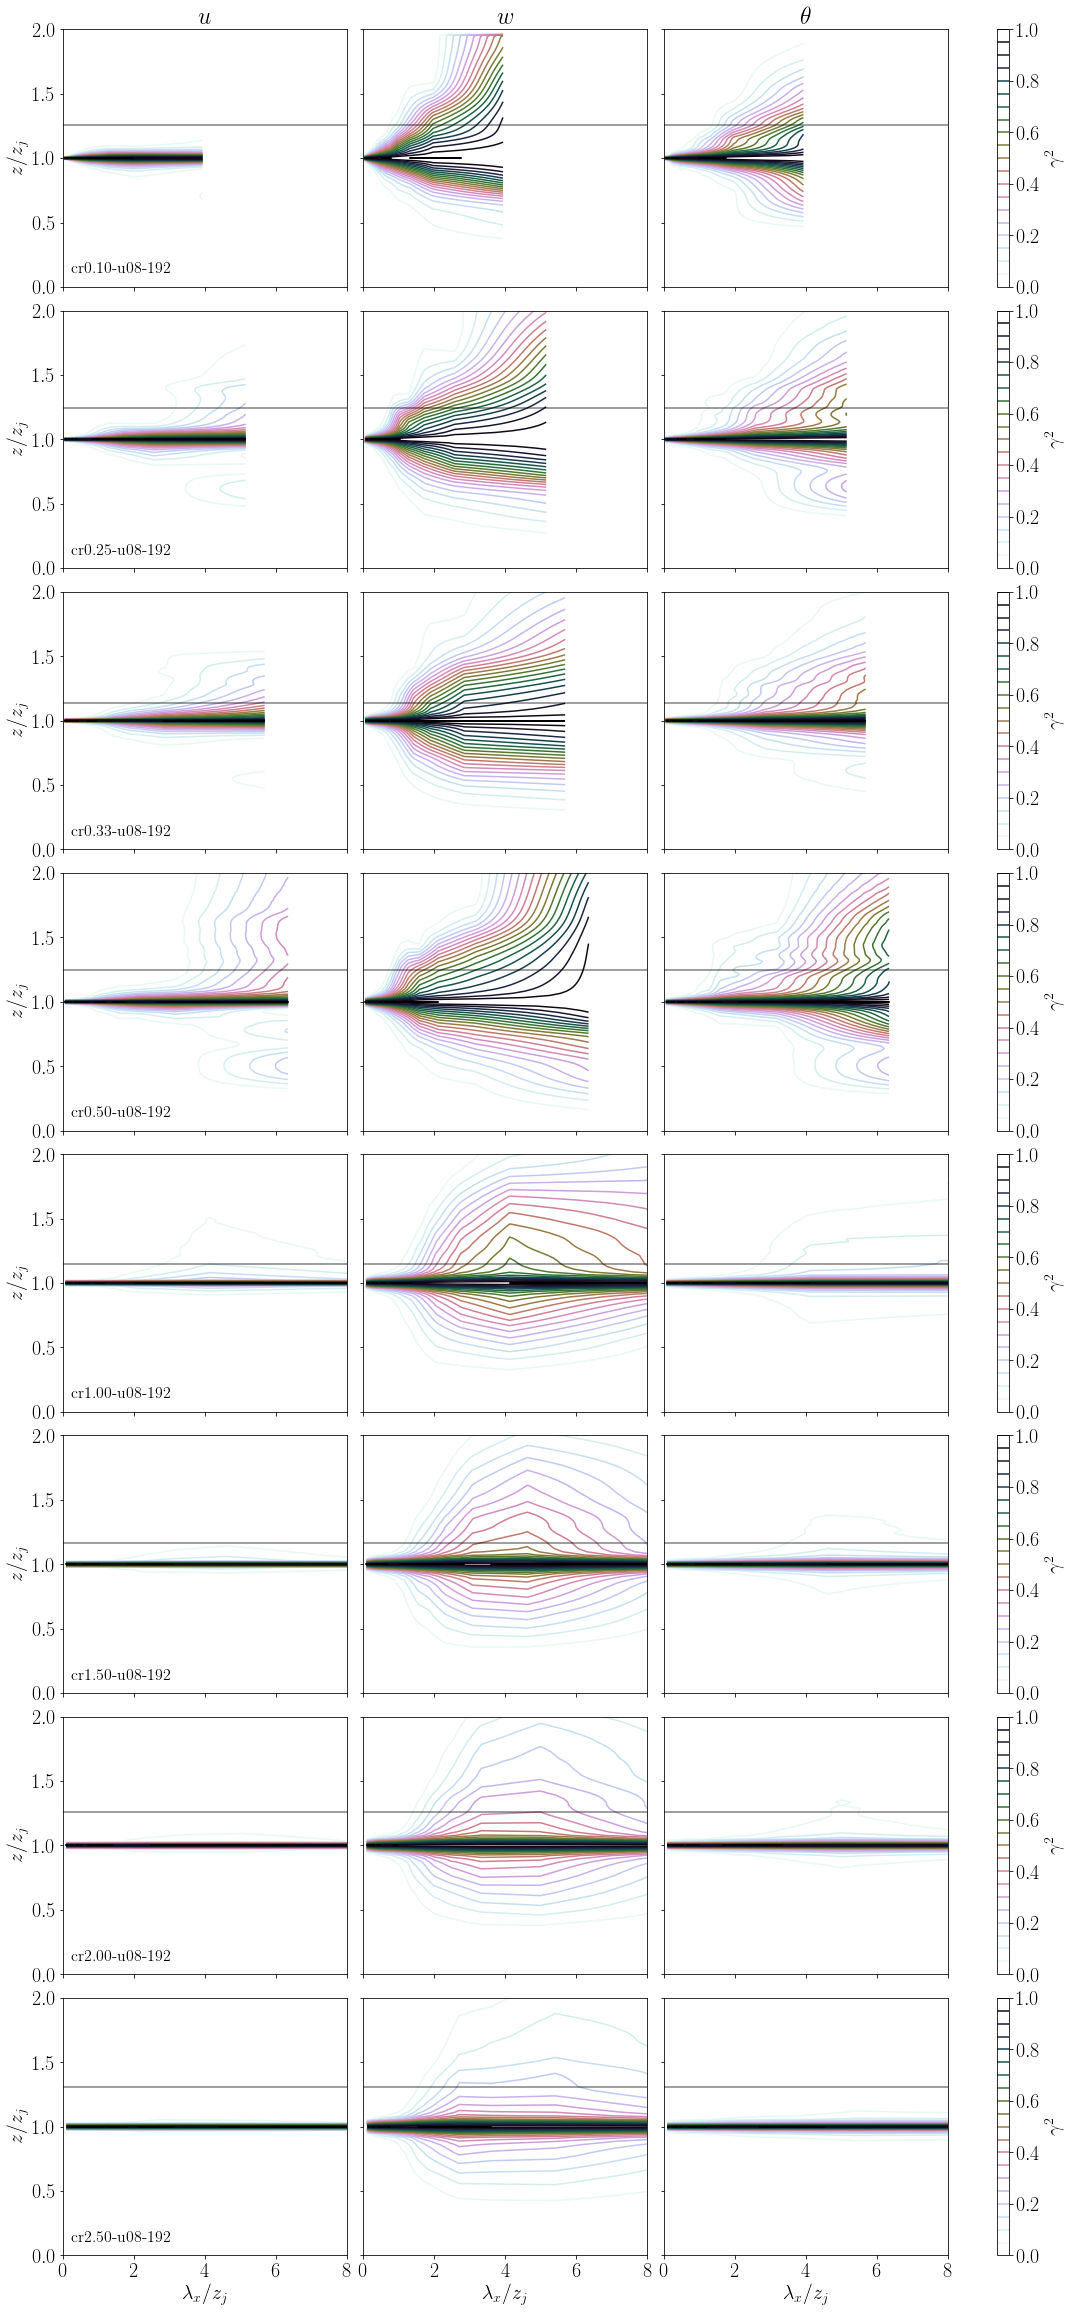

In [7]:
# plot all sims, 1 per row
fig3, ax3 = plt.subplots(nrows=nsim, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(14.8, 4*nsim))
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # G2u
    cax3 = ax3[ii,0].contour(1./g.freq_x/s.zj, g.z/s.zj, g.u.T, cmap=cmap2, levels=np.linspace(0, 1, 21))
    # G2w
    ax3[ii,1].contour(1./g.freq_x/s.zj, g.z/s.zj, g.w.T, cmap=cmap2, levels=np.linspace(0, 1, 21))
    # G2t
    ax3[ii,2].contour(1./g.freq_x/s.zj, g.z/s.zj, g.theta.T, cmap=cmap2, levels=np.linspace(0, 1, 21))
    # colorbar
    cb3 = fig3.colorbar(cax3, ax=ax3[ii,:], location="right", ticks=MultipleLocator(0.2))
    cb3.ax.set_ylabel("$\\gamma^2$")
    # dashed line for h/zj
    [iax.axhline(s.he/s.zj, color="k", alpha=0.5) for iax in ax3[ii,:]]
    # text in lower left corner with stability
    ax3[ii,0].text(0.03, 0.05, "-".join(s.stability.split("_")), fontsize=16, transform=ax3[ii,0].transAxes)

# clean up
ax3[0,0].set_title("$u$")
ax3[0,0].set_ylim([0, 2])
ax3[0,0].yaxis.set_major_locator(MultipleLocator(0.5))
ax3[0,0].set_xlim([0, 8])
ax3[0,0].xaxis.set_major_locator(MultipleLocator(2))
[iax.set_ylabel("$z/z_j$") for iax in ax3[:,0]]
[iax.set_xlabel("$\\lambda_x / z_j$") for iax in ax3[-1,:]]
ax3[0,1].set_title("$w$")
ax3[0,2].set_title("$\\theta$")